## Fáza 1 - prieskumná analýza
 Autor: Martin Katkovčin

**Načítanie potrebných knižníc pre analýzu údajov**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import scipy as sc
import statsmodels.api as sm
import statsmodels.stats as sm_stats
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp

## 1. Základný opis dát spolu s ich charakteristikami

*	počet záznamov

*	počet atribútov

*	ich typy

*	pre zvolené významné atribúty ich distribúcie, základné deskriptívne štatistiky a pod.


### labor.csv - význam atribútov

**relationship** - vzťah osoby  
**hematokrit** - pomer bunkovej časti krvi a objem celej krvi  
**alp** - alkalická fosfatáza (zvýšené hodnoty spôsobujú problémy)  
**indicator** - závislá premenná (potrebuje pacient vyšetrenie v preddefinovam intervale alebo sa môže posunúť)     
**etytr** -  
**hbver** -  
**weight** - váha jedinca  
**er-cv** -   
**leukocyty** - biele krvinky   
**hemoglobin** - červené krvné tkanivo (v zdravom tele okolo 35% z objemu erytrocytov)  
**erytrocyty** - červené krvinky (zabezpečuje prenos kyslíku v organizme človeka)  
**trombocyty** - krvné doštičky (zrážanlivosť krvi)    
**smoker** - fajčiar/nefajčiar  
**alt** -  
**ssn** - atribút na spájanie tabuliek  
**name** - meno jedinca   
**ast** -   

### profiles.csv - význam atribútov

**residence** - sídlo (nemocnice, v ktorej boli vzorky robené)   
**name** - meno jedinca  
**company** - firma, v ktorej pracuje   
**birthdate** - dátum narodenia    
**sex** - pohlavie    
**blood_group** - krvná skupina       
**address** - adresa bydliska   
**race** - rasa   
**ssn** - atribút na spájanie tabuliek

### 1.1 Analýza labor.csv

Načítanie labor.csv s delimiterom \t a Unnamed stĺpec nám netreba pre našu analýzu, takže ho dropujeme.

In [2]:
labor_dataframe = pd.read_csv("IAU_2021_data:054/labor.csv", delimiter = "\t", index_col = 0)

Vypísanie si prvých(posledných) 5 riadkov s príslušnými stĺpcami, aby sme sa mohli pozrieť na hodnoty, s ktorými budeme pracovať a následne hľadať vzájomné vzťahy medzi veličinami.

In [3]:
labor_dataframe.head()
# labor_dataframe.tail()

relationship  hematokrit       alp  indicator    etytr    hbver     weight  \
0      married     7.98605  35.91472        1.0  4.85635  5.25399   96.25994   
1      married     8.22106  58.60041        1.0  7.71875  5.43113  126.63454   
2    separated     5.98902  63.12379        1.0  2.76431  7.18268   45.65333   
3          nop     4.50550  81.45786        0.0  4.83085  7.22120   38.77197   
4      married     5.51852  77.18342        1.0  6.76048  6.07483   44.38614   

      er-cv  leukocyty  hemoglobin  erytrocyty  trombocyty smoker      alt  \
0  55.94441    7.02066     4.40427     6.68671     6.64113      N  1.91308   
1  41.97542    5.55075     4.91791     7.17856     5.93911      N  2.81644   
2  58.62243    4.30041     7.35498     7.79512     4.01140     no  4.33070   
3  41.75852    5.25316     6.97574     6.50932     7.17208     no  3.09006   
4  45.24699    8.61082     6.98992     8.66508     5.62181     no  8.64204   

           ssn              name       ast  
0  126-67-1124    Rachel Bridges  67.79048  
1  358-62-3858  Nicole Henderson  56.21061  
2  736-86-2200  Jennifer Sampson  53.57556  
3  638-79-6051      Kevin Porter  67.68197  
4  036-92-2352      Emma Barrett  68.59512

In [4]:
labor_dataframe.shape[0]

10013

Zistenie počtu atribútov dataframu (počet stĺpcov)

In [5]:
labor_dataframe.shape[1]

17

Zistenie typov atribútov

In [6]:
labor_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10013 entries, 0 to 10012
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   relationship  10013 non-null  object 
 1   hematokrit    9983 non-null   float64
 2   alp           9983 non-null   float64
 3   indicator     10013 non-null  float64
 4   etytr         9983 non-null   float64
 5   hbver         9983 non-null   float64
 6   weight        10013 non-null  float64
 7   er-cv         9983 non-null   float64
 8   leukocyty     9983 non-null   float64
 9   hemoglobin    9983 non-null   float64
 10  erytrocyty    9983 non-null   float64
 11  trombocyty    9983 non-null   float64
 12  smoker        10013 non-null  object 
 13  alt           9983 non-null   float64
 14  ssn           10013 non-null  object 
 15  name          10013 non-null  object 
 16  ast           9983 non-null   float64
dtypes: float64(13), object(4)
memory usage: 1.4+ MB


V tomto našom dataframe sa nachádzajú atribúty typu:

* 13x float

* 4x object

Počet riadkov je 10013 (entries) a počet stĺpcov 17 (total columns).

Pomocou describe(), vieme sa pozrieť, ktoré premenné sú možné identifikovať ako outliers, ktoré treba preskúmať. Toto sú takzvané deskriptívne štatistiky.

In [7]:
labor_dataframe.describe()

hematokrit          alp     indicator        etytr        hbver  \
count  9983.000000  9983.000000  10013.000000  9983.000000  9983.000000   
mean      6.334411    69.753058      0.643064     4.736746     5.949155   
std       1.657536    19.085286      0.479120     1.295163     1.014285   
min       1.026470     0.000000      0.000000     0.000000     2.271130   
25%       5.084760    60.329340      0.000000     3.903460     5.255730   
50%       6.341970    76.423040      1.000000     4.729270     5.948190   
75%       7.537945    83.737115      1.000000     5.550135     6.642790   
max      11.976330   100.000000      1.000000    10.210800    10.049340   

             weight        er-cv    leukocyty   hemoglobin   erytrocyty  \
count  10013.000000  9983.000000  9983.000000  9983.000000  9983.000000   
mean      69.987722    47.223695     5.539983     5.942749     6.709151   
std       34.336063    12.853269     1.583297     1.015134     1.361372   
min      -63.841770     0.000000     0.458990     2.273460     1.573100   
25%       46.607590    38.501605     4.472735     5.257445     5.846720   
50%       70.057510    47.218040     5.208770     5.949160     6.855600   
75%       92.928690    55.912145     6.579325     6.622600     7.652490   
max      194.372490   100.000000    11.713770    10.122170    11.435270   

        trombocyty          alt          ast  
count  9983.000000  9983.000000  9983.000000  
mean      5.973260     3.728336    64.506721  
std       1.022025     3.395655     9.643311  
min       2.087090     0.000000     0.000000  
25%       5.295355     2.189975    57.989890  
50%       5.982440     2.905330    64.464880  
75%       6.662435     4.145365    71.018030  
max       9.810710   100.000000   100.000000

Pomocou tejto tabuľky môžme vidieť základné deskriptívne štatistiky atribútov ako sú: 

* priemer

* štandardná odchýlka

* minimum, maximum

* prvý, druhý(medián) a tretí kvartil

### 1.2 Analýza profiles.csv

Načítanie profiles.csv s delimiterom \t a Unnamed stĺpec nám netreba pre našu analýzu, takže ho dropujeme.

In [8]:
profiles_dataframe = pd.read_csv("IAU_2021_data:054/profiles.csv", delimiter = "\t", index_col = 0)

Vypísanie si prvých(posledných) 5 riadkov s príslušnými stĺpcami, aby sme sa mohli pozrieť na hodnoty, s ktorými budeme pracovať a následne hľadať vzájomné vzťahy medzi veličinami, predovšetkým tento dataframe
nám bude pomáhať identifikovať a rozdeľovať pacientov podľa ich veku, rasy, pohlavia atď...

In [9]:
profiles_dataframe.head()
# labor_dataframe.tail()

residence             name  \
0         55597 James Plaza\nJenniferville, NY 10668       Ricky Howe   
1  47856 Elizabeth Locks\nNew Heatherville, NM 16792     Nicole Jones   
2       9264 Hopkins Fort\nNorth Gailburgh, GA 09965  William Baldwin   
3           7280 Cindy Forge\nShannonmouth, MI 03155    Melissa Brown   
4  77114 Thompson Isle\nNorth Jonathanhaven, TX 8...      Amanda Leon   

                   company    birthdate sex blood_group  \
0           Hayes and Sons  04 Apr 1968   M          O-   
1         Pittman and Sons  12 Dec 1952   F          A+   
2  Lee, Hernandez and Beck   2002-09-10   M          B-   
3            Meyer-Gardner   1964-11-24   F          B+   
4               Farmer PLC   1910/06/20   F          B+   

                                             address    race          ssn  
0          0709 Castillo River\nKellertown, OR 79110  Indian  216-29-8407  
1         842 Martha Squares\nLake Timothy, WV 67192  Indian  388-10-6456  
2             0918 Faulkner Street\nLeeton, NC 98115   White  633-19-0754  
3  5573 Lisa Mission Suite 289\nNorth Alisonmouth...   Asian  800-85-2309  
4                   Unit 6810 Box 0077\nDPO AP 43348   Asian  345-61-9332

Zistenie počtu záznamov dataframu

In [10]:
profiles_dataframe.shape[0]

3086

Zistenie počtu atribútov dataframu (počet stĺpcov)

In [11]:
profiles_dataframe.shape[1]

9

Zistenie typov atribútov

In [12]:
profiles_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3085
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   residence    3086 non-null   object
 1   name         3086 non-null   object
 2   company      3086 non-null   object
 3   birthdate    3086 non-null   object
 4   sex          3086 non-null   object
 5   blood_group  3086 non-null   object
 6   address      3086 non-null   object
 7   race         3086 non-null   object
 8   ssn          3086 non-null   object
dtypes: object(9)
memory usage: 241.1+ KB


V tomto našom dataframe sa nachádzajú atribúty typu:

* 9x object

Počet riadkov je 3086 (entries) a počet stĺpcov 9 (total columns).

Pomocou describe(), vieme sa pozrieť, ktoré premenné sú možné identifikovať ako outliers, ktoré treba preskúmať. Toto sú takzvané deskriptívne štatistiky.

In [13]:
profiles_dataframe.describe()

residence           name    company  \
count                                          3086           3086       3086   
unique                                         3086           3015       2878   
top     98681 Curtis Tunnel\nMichaelburgh, MS 83432  John Williams  Smith LLC   
freq                                              1              3          6   

                   birthdate   sex blood_group  \
count                   3086  3086        3086   
unique                  3054     2           8   
top     04/13/1980, 00:00:00     F         AB+   
freq                       3  1576         416   

                                 address   race          ssn  
count                               3086   3086         3086  
unique                              3086      8         3086  
top     PSC 8067, Box 0027\nAPO AE 89809  White  348-93-0557  
freq                                   1   1512            1

Pomocou tejto tabuľky môžme vidieť základné deskriptívne štatistiky atribútov, ale veľa z nich nám veľmi netreba, ale dôležité pre nás sú: 

* count

* unique

## 4. Identifikácia problémov v dátach s navrhnutým riešením

*	Identifikujte problémy v dátach napr.: nevhodná štruktúra dát, duplicitné záznamy, nejednotné formáty, chýbajúce hodnoty, vychýlené hodnoty. V dátach sa môžu nachádzať aj iné, tu nevymenované problémy.

*	Navrhnuté riešenie prvotne realizujte na dátach.

### 4.1 Data cleaning - labor.csv

Funkcia, ktorá z daného dataframu nám vypíše počet unikátnych hodnôt stĺpca a taktiež počet NA hodnôt stĺpca... Pomôže nám pri data cleaningu, že budeme vedieť, kde sa NA hodnoty nachádzajú atď.

In [14]:
def __column_description__(dataframe):
    for column in dataframe:
        print("Column name: " + str(column))
        print("Number of values: " +str(getattr(dataframe, column).shape[0]))
        print("Number of unique values: " + str(getattr(dataframe,str(column)).unique().__len__()))
        print("Number of NA values: " + str(getattr(dataframe, column).shape[0] - getattr(dataframe, column).dropna().shape[0]))
        print("")

__column_description__(labor_dataframe)

Column name: relationship
Number of values: 10013
Number of unique values: 6
Number of NA values: 0

Column name: hematokrit
Number of values: 10013
Number of unique values: 9805
Number of NA values: 30

Column name: alp
Number of values: 10013
Number of unique values: 9880
Number of NA values: 30

Column name: indicator
Number of values: 10013
Number of unique values: 2
Number of NA values: 0

Column name: etytr
Number of values: 10013
Number of unique values: 9777
Number of NA values: 30

Column name: hbver
Number of values: 10013
Number of unique values: 9741
Number of NA values: 30

Column name: weight
Number of values: 10013
Number of unique values: 9911
Number of NA values: 0

Column name: er-cv
Number of values: 10013
Number of unique values: 9878
Number of NA values: 30

Column name: leukocyty
Number of values: 10013
Number of unique values: 9787
Number of NA values: 30

Column name: hemoglobin
Number of values: 10013
Number of unique values: 9754
Number of NA values: 30

Colum

Môžeme vidieť, že máme 4 unikátne hodnoty v atribúte 'smoker', čo znamená, že tam budeme musieť zmeniť hodnoty tak, aby sme mali iba 2 hodnoty - Y (fajčiar) a N (nefajčiar).

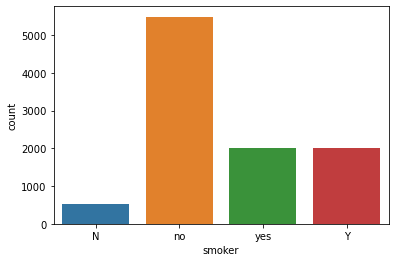

In [15]:
sns.countplot(x = labor_dataframe["smoker"]);

Z grafu vidíme, že budeme musieť nahradiť values tak, aby sme mohli rozdeliť hodnoty na binárne.

Nahradíme 'no' za 'N' a 'yes' 'Y', aby sme dosiahli 2 unikátne hodnoty a zobrazíme na grafe a porovnáme hodnoty medzi sebou.

Zatiaľ sme to spravili takto pre štatistiky, v ďalšej fáze budeme nahradzať všetky 'stringové' hodnoty na číselné, pretože naše algoritmy strojového učenia, ktoré budeme používať, dokážu spracovať iba hodnoty číselné, ale pre vizualizáciu začiatočnú, sme si zvolili takúto cestu.

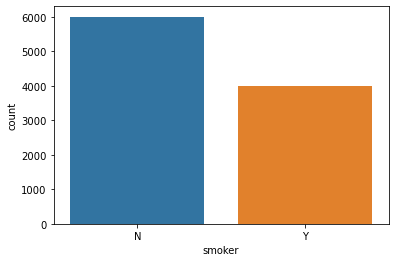

In [16]:
labor_dataframe["smoker"] = labor_dataframe["smoker"].replace(["no", "yes"], ["N", "Y"])
sns.countplot(x = labor_dataframe["smoker"]);

relationship
divoced        [divoced]
married        [married]
nop                [nop]
separated    [separated]
single          [single]
widowed        [widowed]
Name: relationship, dtype: object


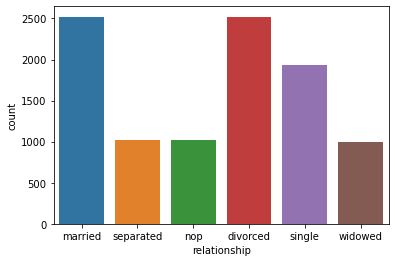

In [17]:
print(labor_dataframe.groupby("relationship")["relationship"].unique())
labor_dataframe["relationship"] = labor_dataframe["relationship"].replace("divoced", "divorced")
sns.countplot(x = labor_dataframe["relationship"]);

V stĺpci 'relationship' sme našli typos 'divoced' zmenené na hodnotu'divorced'.

Taktiež v budúcnosti budeme pravdepodobne mergovať hodnoty, aby sme mali menej premenných, aby sa nám s tým lepšie pracovalo a taktiež dali do číselných podôb.

Zistíme, či máme nejaké duplikované riadky, a ak áno, tak následne ich z labor_dataframe dropneme.

In [18]:
print(labor_dataframe.duplicated().sum(), end= " ")
labor_dataframe = labor_dataframe.drop_duplicates()
print(labor_dataframe.duplicated().sum())

99 0


Zistíme, koľko máme NA values v celom labor_dataframe, taktiež si zistíme, v koľkých riadkoch sa tie NA hodnoty nachádzajú a následne sme si zvolili, že ich môžme z labor_dataframe dropnúť, keďže ich nie je až tak veľké množstvo.

In [19]:
labor_dataframe.isna().sum().sum()

330

In [20]:
NA_values = labor_dataframe.isnull()
row_has_NA = NA_values.any(axis=1)
rows_with_NA = labor_dataframe[row_has_NA]
print("Rows with NA -", len(rows_with_NA))

labor_dataframe = labor_dataframe.dropna()
rows_with_NA.head()

Rows with NA - 324


relationship  hematokrit       alp  indicator    etytr    hbver    weight  \
12       widowed     7.60427  74.43271        1.0  3.96012      NaN  93.56371   
54      divorced     4.88013       NaN        0.0  4.64601  6.80701  30.17339   
95     separated     4.71459  88.45040        0.0  3.77506  6.48374  23.48661   
112      widowed     5.91890  51.47459        0.0  4.39466  6.63045  97.44792   
143      married     7.51413  80.07077        1.0      NaN  6.00157  37.82567   

        er-cv  leukocyty  hemoglobin  erytrocyty  trombocyty smoker      alt  \
12   46.74343    3.41796     5.55296     8.11372     5.41229      Y  5.47722   
54   47.42089    4.68953     6.07447     7.06566     7.54645      N  2.60416   
95   53.52395    5.20395     6.18888     4.31491     7.86852      N      NaN   
112  60.90464        NaN     4.81907     7.54638     7.25706      N  3.75320   
143  53.27849    8.99154     6.57660     6.88076     5.58871      N  3.40887   

             ssn                  name       ast  
12   096-75-0119           Eric Juarez  76.38029  
54   883-62-3693  Mrs. Angela Martinez  69.92631  
95   845-52-9465            Randy Ward  49.21308  
112  579-40-2197     Stephanie Fuentes  55.98270  
143  711-67-4643        Jennifer Hayes  71.20077

### 4.2 Data cleaning - profiles.csv

Funkcia, ktorá z daného dataframu nám vypíše počet unikátnych hodnôt stĺpca a taktiež počet NA hodnôt stĺpca... Pomôže nám pri data cleaningu, že budeme vedieť, kde sa NA hodnoty nachádzajú atď.

In [21]:
def __column_description__(dataframe):
    for column in dataframe:
        print("Column name: " + str(column))
        print("Number of values: " +str(getattr(dataframe, column).shape[0]))
        print("Number of unique values: " + str(getattr(dataframe,str(column)).unique().__len__()))
        print("Number of NA values: " + str(getattr(dataframe, column).shape[0] - getattr(dataframe, column).dropna().shape[0]))
        print("")

__column_description__(profiles_dataframe)

Column name: residence
Number of values: 3086
Number of unique values: 3086
Number of NA values: 0

Column name: name
Number of values: 3086
Number of unique values: 3015
Number of NA values: 0

Column name: company
Number of values: 3086
Number of unique values: 2878
Number of NA values: 0

Column name: birthdate
Number of values: 3086
Number of unique values: 3054
Number of NA values: 0

Column name: sex
Number of values: 3086
Number of unique values: 2
Number of NA values: 0

Column name: blood_group
Number of values: 3086
Number of unique values: 8
Number of NA values: 0

Column name: address
Number of values: 3086
Number of unique values: 3086
Number of NA values: 0

Column name: race
Number of values: 3086
Number of unique values: 8
Number of NA values: 0

Column name: ssn
Number of values: 3086
Number of unique values: 3086
Number of NA values: 0



V tomto profiles_dataframe sa nenachádzajú žiadne NA hodnoty

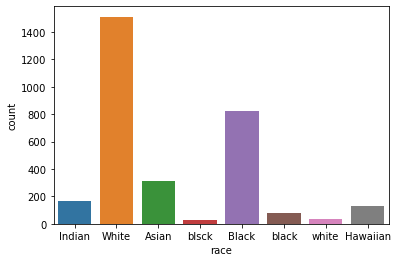

In [22]:
sns.countplot(x = profiles_dataframe["race"]);

Z grafu vidíme, že budeme musieť nahradiť values tak, aby sme mohli rozdeliť hodnoty na binárne.

Nahradíme 'black' za 'Black', 'blsck' za 'Black', 'white' za  'White'. Zvolili sme si s veľkým písmenom, pretože stĺpce Indian, Hawaiian a Asian majú taktiež uppercase na začiatku.

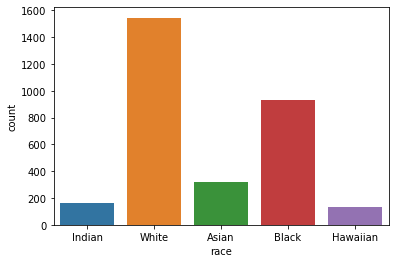

In [23]:
profiles_dataframe["race"] = profiles_dataframe["race"].replace(["blsck", "black", "white"], ["Black", "Black", "White"])
sns.countplot(x = profiles_dataframe["race"]);

Zistíme, či máme nejaké duplikované riadky, a ak áno, tak následne ich z profiles_dataframe dropneme

In [24]:
print(profiles_dataframe.duplicated().sum(), end = " ")
profiles_dataframe = profiles_dataframe.drop_duplicates()
print(profiles_dataframe.duplicated().sum())

0 0


Vidíme, že máme rôzne formáty dátumov v dataframe, tak musíme upraviť na jednotný formát.

In [25]:
profiles_dataframe.head()

residence             name  \
0         55597 James Plaza\nJenniferville, NY 10668       Ricky Howe   
1  47856 Elizabeth Locks\nNew Heatherville, NM 16792     Nicole Jones   
2       9264 Hopkins Fort\nNorth Gailburgh, GA 09965  William Baldwin   
3           7280 Cindy Forge\nShannonmouth, MI 03155    Melissa Brown   
4  77114 Thompson Isle\nNorth Jonathanhaven, TX 8...      Amanda Leon   

                   company    birthdate sex blood_group  \
0           Hayes and Sons  04 Apr 1968   M          O-   
1         Pittman and Sons  12 Dec 1952   F          A+   
2  Lee, Hernandez and Beck   2002-09-10   M          B-   
3            Meyer-Gardner   1964-11-24   F          B+   
4               Farmer PLC   1910/06/20   F          B+   

                                             address    race          ssn  
0          0709 Castillo River\nKellertown, OR 79110  Indian  216-29-8407  
1         842 Martha Squares\nLake Timothy, WV 67192  Indian  388-10-6456  
2             0918 Faulkner Street\nLeeton, NC 98115   White  633-19-0754  
3  5573 Lisa Mission Suite 289\nNorth Alisonmouth...   Asian  800-85-2309  
4                   Unit 6810 Box 0077\nDPO AP 43348   Asian  345-61-9332

In [26]:
profiles_dataframe["birthdate"] = profiles_dataframe.birthdate.apply(lambda x: pd.to_datetime(x).strftime("%Y-%m-%d"))
profiles_dataframe.head()

residence             name  \
0         55597 James Plaza\nJenniferville, NY 10668       Ricky Howe   
1  47856 Elizabeth Locks\nNew Heatherville, NM 16792     Nicole Jones   
2       9264 Hopkins Fort\nNorth Gailburgh, GA 09965  William Baldwin   
3           7280 Cindy Forge\nShannonmouth, MI 03155    Melissa Brown   
4  77114 Thompson Isle\nNorth Jonathanhaven, TX 8...      Amanda Leon   

                   company   birthdate sex blood_group  \
0           Hayes and Sons  1968-04-04   M          O-   
1         Pittman and Sons  1952-12-12   F          A+   
2  Lee, Hernandez and Beck  2002-09-10   M          B-   
3            Meyer-Gardner  1964-11-24   F          B+   
4               Farmer PLC  1910-06-20   F          B+   

                                             address    race          ssn  
0          0709 Castillo River\nKellertown, OR 79110  Indian  216-29-8407  
1         842 Martha Squares\nLake Timothy, WV 67192  Indian  388-10-6456  
2             0918 Faulkner Street\nLeeton, NC 98115   White  633-19-0754  
3  5573 Lisa Mission Suite 289\nNorth Alisonmouth...   Asian  800-85-2309  
4                   Unit 6810 Box 0077\nDPO AP 43348   Asian  345-61-9332

Teraz už budeme môcť vyrátavať vek našich pacientov prostredníctvom jednotného formátu dátumu narodenia.

### 4.3 Identifikácia problémov v dátach (súhrn)

In [27]:
merged_dataframe = pd.merge(labor_dataframe, profiles_dataframe, on = "ssn", how = "inner")
merged_dataframe = merged_dataframe.drop(columns = "name_x")
merged_dataframe = merged_dataframe.rename(columns = {"name_y" : "name"})

Spojenie oboch datasetov na základe parametra "ssn", ktorý je spojkou medzi tabuľkami a následné skúmanie vzťahov medzi nimi. Taktiež dropneme jeden zo stĺpcov a premenujeme ho, lebo budeme mať duplicitný name_x a name_y a zachováme si iba name.

In [28]:
labor_dataframe.shape[0] - profiles_dataframe.shape[0]

6504

Zistili sme, že v labor_dataframe je o 6504 záznamov viac ako v profiles_dataframe, čo v nás evokuje to, že budeme mať možno nejaké duplicitné záznamy v spojenom datasete a napárovanom pomocou atribútu 'ssn'.

In [29]:
merged_dataframe.duplicated(["name", "address"]).sum()

6505

Môžeme vidieť, že v merged dataframe, sú rovnakí ľudia, nižšie tabuľka.

In [30]:
merged_dataframe[merged_dataframe.name.isin(merged_dataframe.name[merged_dataframe.name.duplicated()])].sort_values(by=['name']).head()

relationship  hematokrit       alp  indicator    etytr    hbver  \
3745       single     8.01476  85.59874        1.0  6.26477  6.81723   
3746      married     9.13670  93.43834        1.0  6.61397  6.28265   
3747          nop     7.15813  64.41078        1.0  3.22783  8.04004   
4798    separated     4.59381  17.98734        0.0  5.00721  5.90563   
4797      married     4.80152  65.56196        0.0  4.78611  5.97981   

         weight     er-cv  leukocyty  hemoglobin  ...          ssn       ast  \
3745   91.13468  60.33137    5.27387     6.61051  ...  633-77-0635  70.49772   
3746   29.24111  25.59530    3.41622     6.38598  ...  633-77-0635  71.90646   
3747  101.24255  50.41132    9.40921     5.22708  ...  633-77-0635  65.86702   
4798  100.62005  47.12843    4.47131     3.70794  ...  746-76-1526  62.57306   
4797   77.20000  33.96525    4.33177     5.04427  ...  746-76-1526  64.80523   

                                              residence            name  \
3745  7066 Carla Inlet Apt. 994\nJenniferland, NE 75635   Aaron Bradley   
3746  7066 Carla Inlet Apt. 994\nJenniferland, NE 75635   Aaron Bradley   
3747  7066 Carla Inlet Apt. 994\nJenniferland, NE 75635   Aaron Bradley   
4798  963 Rebecca Hollow Apt. 899\nSouth Amyside, MN...  Aaron Campbell   
4797  963 Rebecca Hollow Apt. 899\nSouth Amyside, MN...  Aaron Campbell   

             company   birthdate sex blood_group  \
3745  Williams-Young  2006-05-25   M          A-   
3746  Williams-Young  2006-05-25   M          A-   
3747  Williams-Young  2006-05-25   M          A-   
4798   Wang-Williams  1951-02-17   M          B-   
4797   Wang-Williams  1951-02-17   M          B-   

                                                address   race  
3745             72601 Cox Corners\nCalebfort, ME 48882  White  
3746             72601 Cox Corners\nCalebfort, ME 48882  White  
3747             72601 Cox Corners\nCalebfort, ME 48882  White  
4798  2753 Jodi Passage Apt. 156\nMatthewhaven, VT 6...  White  
4797  2753 Jodi Passage Apt. 156\nMatthewhaven, VT 6...  White  

[5 rows x 24 columns]

V merged dataframe môžeme vidieť, že máme rovnakých ľudí v dataframe, čo znamená, že v ďalšej fáze sa nimi budeme zaoberať, že čo budeme s takýmto množstvom robiť, či ich budeme nahrádzať, alebo premenovávať atď...

In [31]:
def identify_outliers(column):
    quantil25 = column.quantile(0.25)
    quantil75 = column.quantile(0.75)
    
    interquantilrange = quantil75 - quantil25
        
    lower = quantil25 - 1.5 * interquantilrange
    upper = quantil75 + 1.5 * interquantilrange
    
    return column[(column < lower) | (column > upper)]

In [32]:
element = labor_dataframe.select_dtypes(exclude = "O")
for column_name in element.columns.values:
    print(column_name , " " *(20 - len(column_name)), 
          len(identify_outliers(element[column_name])))  

hematokrit            16
alp                   364
indicator             0
etytr                 138
hbver                 59
weight                65
er-cv                 74
leukocyty             58
hemoglobin            72
erytrocyty            65
trombocyty            81
alt                   735
ast                   67


Zistili sme si aj počet outlierov, ktorých potom budeme riešiť v ďalšej fáze, ale pri menšom počte ich môžeme pokojne vymazať, ale pri väčšom nahrádzať, či už priemerom, najčastejšou hodnotou alebo iným spôsobom. 

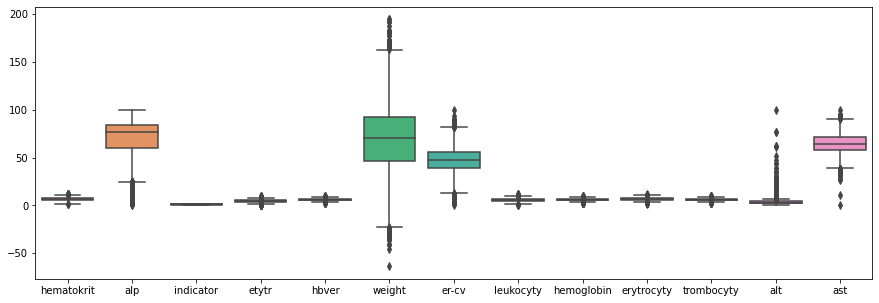

In [33]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.boxplot(ax=ax, data = labor_dataframe);

Taktiež sa dajú zobraziť aj na boxplotoch, zobrazíme si taktiež aj váhu konkrétne, pretože na nej najviac vidieť vychýlené hodnoty.

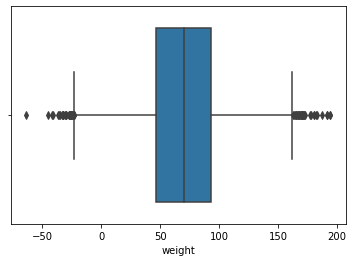

In [34]:
sns.boxplot(x = "weight", data = labor_dataframe);

Môžeme si všimnúť aj mínusové hodnoty vo váhe, čo je nezmyselná hodnota.

V predošlých podkapitolách 4.1 a 4.2 sme identifikovali nejaké defekty v dátach, ktoré by sme chceli zhrnúť:

* Nevhodná štruktúra dát
    * nahradzovanie hodnôt, aby sme mohli vyhodnocovať binárne - pri stĺpci 'smoker', sme mali viacero honôt rôznych
    * vyriešili sme aj rôzne 'typos', ktoré sa v datasete nachádzali
 
* Duplicitné záznamy
    * v datasete labor_dataframe sme našli nejaké duplikáty

* Nejednotné formáty
    * v stĺpci sa nachádzalo viac formátov zápisu dátumu
    * upravili sme na jednotný formát

* Chýbajúce hodnoty
    * v dátach sa taktiež nachádzajú NA hodnoty
    * nachádzajú sa taktiež aj viac ako 1 NA hodnota na riadok

* Vychýlené hodnoty (outliers)
    * vo väčšine stĺpcov sa nachádzali outliers, ale pre také najviac signifikantné sme na ukážku zvolili graf s váhami pacientov



### 1.3 Významné atribúty a ich distribúcie

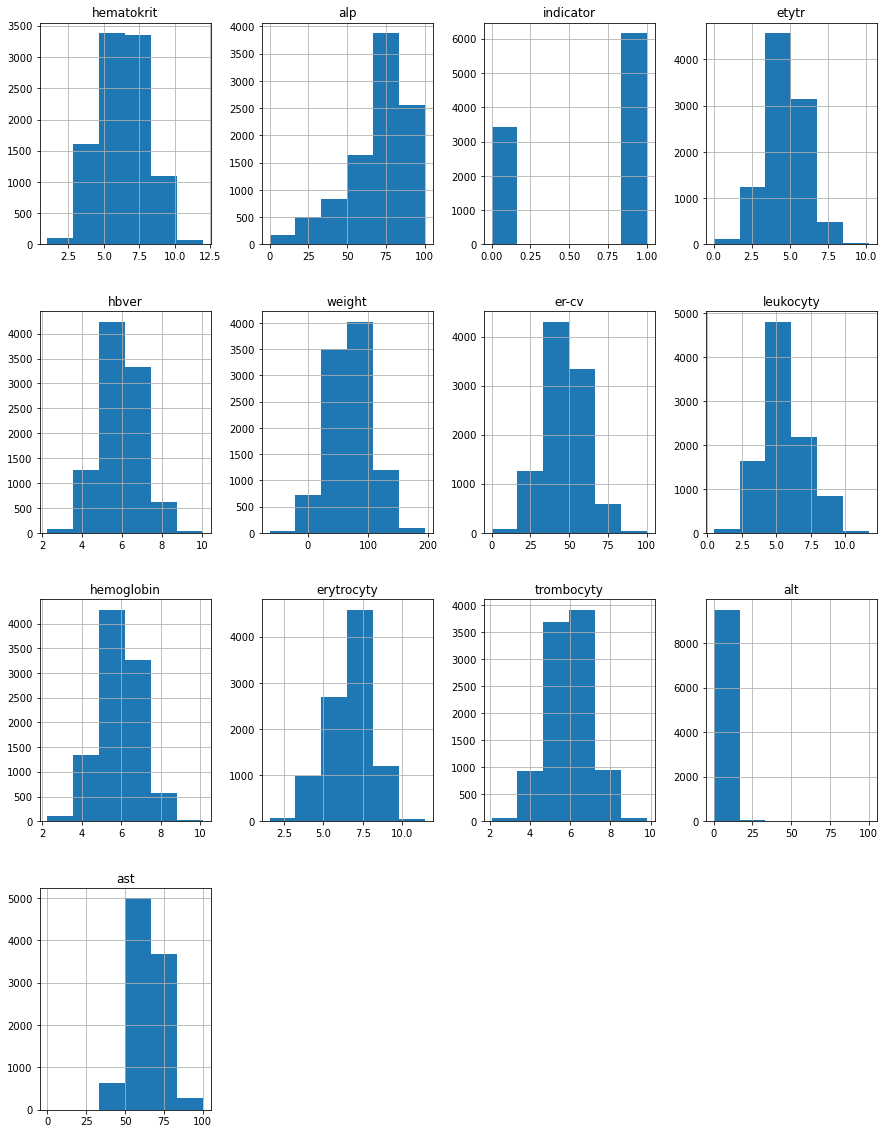

In [35]:
labor_dataframe.hist(bins = 6, figsize = (15,20));

Zobrazenie hodnôt, s ktorými budeme pracovať v dataframoch.

race
Asian        316
Black        929
Hawaiian     132
Indian       165
White       1544
dtype: int64

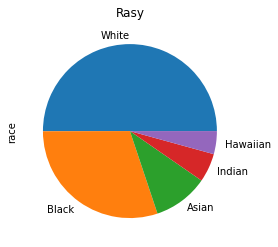

In [36]:
profiles_dataframe["race"].value_counts().plot(kind = "pie", label = "race", title = "Rasy")
pd.pivot_table(profiles_dataframe, aggfunc = "size" , columns = "race")

Zobrazenie rás v grafe, kde je jasne vidieť, že naša vzorka je väčšinou zastúpená bielou rasou.

race  Asian  Black  Hawaiian  Indian  White
sex                                        
F       156    467        61      79    813
M       160    462        71      86    731


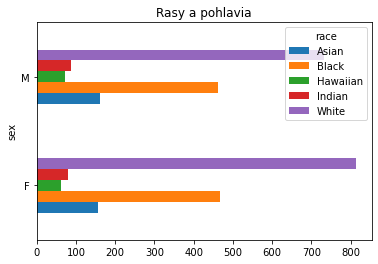

In [37]:
pd.pivot_table(profiles_dataframe, aggfunc = "size" , index = "sex", columns = "race").plot(kind = "barh", title = "Rasy a pohlavia")
print(pd.pivot_table(profiles_dataframe, aggfunc = "size" , index = "sex",columns = "race"))

Jeden z významných atribútov v našom výskume bude podľa nás záležat na tom, či je človek pohlavia muž alebo žena a taktiež veľký vplyv bude mať taktiež aj rasa na indikátor. 

Môžeme vidieť, že v oboch prípadoch, či sú to muži alebo ženy, tak značne najviac s bielou rasou, takže budeme vyhodnocovať skrz percentuálne časti prostredníctvom indikátora.

race    Asian  Black  Hawaiian  Indian  White
smoker                                       
N         636   1746       258     302   2822
Y         359   1140       151     215   1961


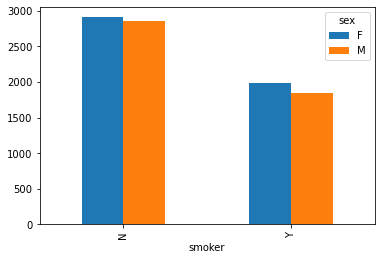

In [38]:
print (pd.pivot_table(merged_dataframe, aggfunc = "size", index = "smoker", columns = "race"))
pd.pivot_table(merged_dataframe, aggfunc = "size", index = "smoker", columns = "sex").plot.bar();

Distribúcia fajčiarov podľa pohlavia.

sex              F         M
race                        
Asian     5.969190  5.881964
Black     5.983972  5.936145
Hawaiian  5.779030  6.010093
Indian    6.024326  5.830658
White     5.952506  5.918587


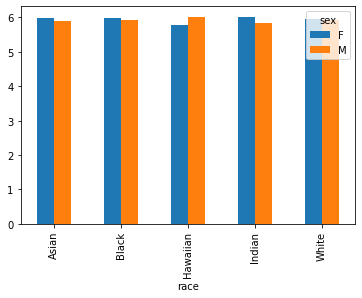

In [39]:
print(pd.pivot_table(merged_dataframe, values= "hemoglobin", aggfunc = np.mean, index= "race", columns= "sex"))
pd.pivot_table(merged_dataframe, values= "hemoglobin", aggfunc = np.mean, index= "race", columns= "sex").plot.bar();

Priemerné hodnoty hemoglobínu podľa rasy.

blood_group
A+     381
A-     400
AB+    416
AB-    360
B+     410
B-     380
O+     355
O-     384
dtype: int64


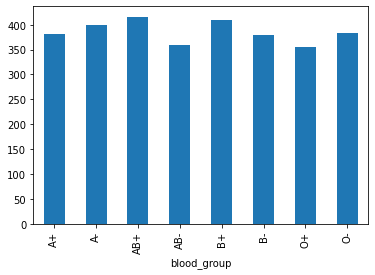

In [40]:
pd.pivot_table(profiles_dataframe, aggfunc = "size" , columns = "blood_group").plot(kind = "bar")
print(pd.pivot_table(profiles_dataframe, aggfunc = "size" , columns = "blood_group"))

Zobrazenie hodnôť typu skupiny krvi pacientov. V budúcnosti budeme určite používať závislosť rôznych hodnôt podľa typu krvi pacientov.

## 2. Párová analýza dát - labor.csv a profiles.csv 

*	preskúmajte vzťahy medzi zvolenými dvojicami atribútov.

*	identifikujte závislostí medzi dvojicami atribútov a závislosti medzi predikovanou premennou a ostatnými premennými.


Vypísanie si prvých (posledných) 5 riadkov s príslušnými stĺpcami, aby sme sa mohli pozrieť na hodnoty, s ktorými budeme pracovať a následne hľadať vzájomné vzťahy medzi veličinami oboch tabuliek.

In [41]:
merged_dataframe.head()
# merged_dataframe.tail()

relationship  hematokrit       alp  indicator    etytr    hbver     weight  \
0      married     7.98605  35.91472        1.0  4.85635  5.25399   96.25994   
1     divorced     4.93283  75.33679        0.0  5.59998  9.27414   29.51229   
2      married     3.55419  69.49522        0.0  5.36091  6.44353   19.56509   
3     divorced     6.66681  85.35914        0.0  3.96933  5.43904   96.56157   
4      married     8.22106  58.60041        1.0  7.71875  5.43113  126.63454   

      er-cv  leukocyty  hemoglobin  ...          ssn       ast  \
0  55.94441    7.02066     4.40427  ...  126-67-1124  67.79048   
1  41.61444    4.59915     5.47178  ...  126-67-1124  86.15844   
2  35.15155    5.53585     7.15290  ...  126-67-1124  62.48992   
3  34.88919    3.95987     6.60966  ...  126-67-1124  61.97566   
4  41.97542    5.55075     4.91791  ...  358-62-3858  56.21061   

                                       residence              name  \
0  2748 William Underpass\nWest Warren, WY 64316    Rachel Bridges   
1  2748 William Underpass\nWest Warren, WY 64316    Rachel Bridges   
2  2748 William Underpass\nWest Warren, WY 64316    Rachel Bridges   
3  2748 William Underpass\nWest Warren, WY 64316    Rachel Bridges   
4       43671 Jeremy Dale\nNew Cynthia, RI 59099  Nicole Henderson   

          company   birthdate sex blood_group  \
0  Wagner-Aguilar  1973-01-12   F          B+   
1  Wagner-Aguilar  1973-01-12   F          B+   
2  Wagner-Aguilar  1973-01-12   F          B+   
3  Wagner-Aguilar  1973-01-12   F          B+   
4     Dunn-Willis  1915-07-20   F          B+   

                                             address    race  
0  623 Willis Spurs Suite 594\nPort Stephanie, AK...  Indian  
1  623 Willis Spurs Suite 594\nPort Stephanie, AK...  Indian  
2  623 Willis Spurs Suite 594\nPort Stephanie, AK...  Indian  
3  623 Willis Spurs Suite 594\nPort Stephanie, AK...  Indian  
4          730 Kevin Coves\nWilliamborough, WV 59945   Black  

[5 rows x 24 columns]

Zobrazíme korelácie medzi stĺpcami - čím bližšie k jednotke, tak tým je sila korelácie väčšia a naopak, čím bližšie k 0, tak tým menšia -> korelácia je závislosť atribútov.

Ak dosiahneme koreláciu 1, tak to predstavuje perfektnú koreláciu ak 0 tak žiadnu koreláciu medzi dvoma atribútmi v tabuľke.

In [42]:
merged_dataframe.corr()

hematokrit       alp  indicator     etytr     hbver    weight  \
hematokrit    1.000000  0.004327   0.647097  0.022568 -0.008907  0.002162   
alp           0.004327  1.000000  -0.021881 -0.006122  0.012581 -0.014749   
indicator     0.647097 -0.021881   1.000000 -0.001296 -0.004271  0.007098   
etytr         0.022568 -0.006122  -0.001296  1.000000  0.008889 -0.010404   
hbver        -0.008907  0.012581  -0.004271  0.008889  1.000000  0.013310   
weight        0.002162 -0.014749   0.007098 -0.010404  0.013310  1.000000   
er-cv        -0.005116  0.016847  -0.006701  0.004364  0.026011 -0.004751   
leukocyty     0.068811 -0.018445   0.343788  0.035271 -0.017483 -0.003458   
hemoglobin   -0.011838  0.421240  -0.016745 -0.005400  0.003366 -0.005333   
erytrocyty   -0.001888 -0.022328   0.397751  0.366278 -0.000249 -0.007621   
trombocyty   -0.007923  0.016097  -0.005148 -0.000104  0.019451  0.000777   
alt          -0.131920 -0.007911   0.182078  0.281231  0.005818  0.007920   
ast          -0.009203 -0.002864  -0.008622  0.011940  0.005524 -0.008914   

               er-cv  leukocyty  hemoglobin  erytrocyty  trombocyty       alt  \
hematokrit -0.005116   0.068811   -0.011838   -0.001888   -0.007923 -0.131920   
alp         0.016847  -0.018445    0.421240   -0.022328    0.016097 -0.007911   
indicator  -0.006701   0.343788   -0.016745    0.397751   -0.005148  0.182078   
etytr       0.004364   0.035271   -0.005400    0.366278   -0.000104  0.281231   
hbver       0.026011  -0.017483    0.003366   -0.000249    0.019451  0.005818   
weight     -0.004751  -0.003458   -0.005333   -0.007621    0.000777  0.007920   
er-cv       1.000000  -0.001327    0.010406    0.003530   -0.009885  0.000003   
leukocyty  -0.001327   1.000000    0.007366    0.141551   -0.008397  0.101749   
hemoglobin  0.010406   0.007366    1.000000   -0.015030   -0.001923 -0.000805   
erytrocyty  0.003530   0.141551   -0.015030    1.000000   -0.010475  0.627639   
trombocyty -0.009885  -0.008397   -0.001923   -0.010475    1.000000  0.002602   
alt         0.000003   0.101749   -0.000805    0.627639    0.002602  1.000000   
ast         0.004151   0.027303   -0.026169    0.007383   -0.025320  0.019429   

                 ast  
hematokrit -0.009203  
alp        -0.002864  
indicator  -0.008622  
etytr       0.011940  
hbver       0.005524  
weight     -0.008914  
er-cv       0.004151  
leukocyty   0.027303  
hemoglobin -0.026169  
erytrocyty  0.007383  
trombocyty -0.025320  
alt         0.019429  
ast         1.000000

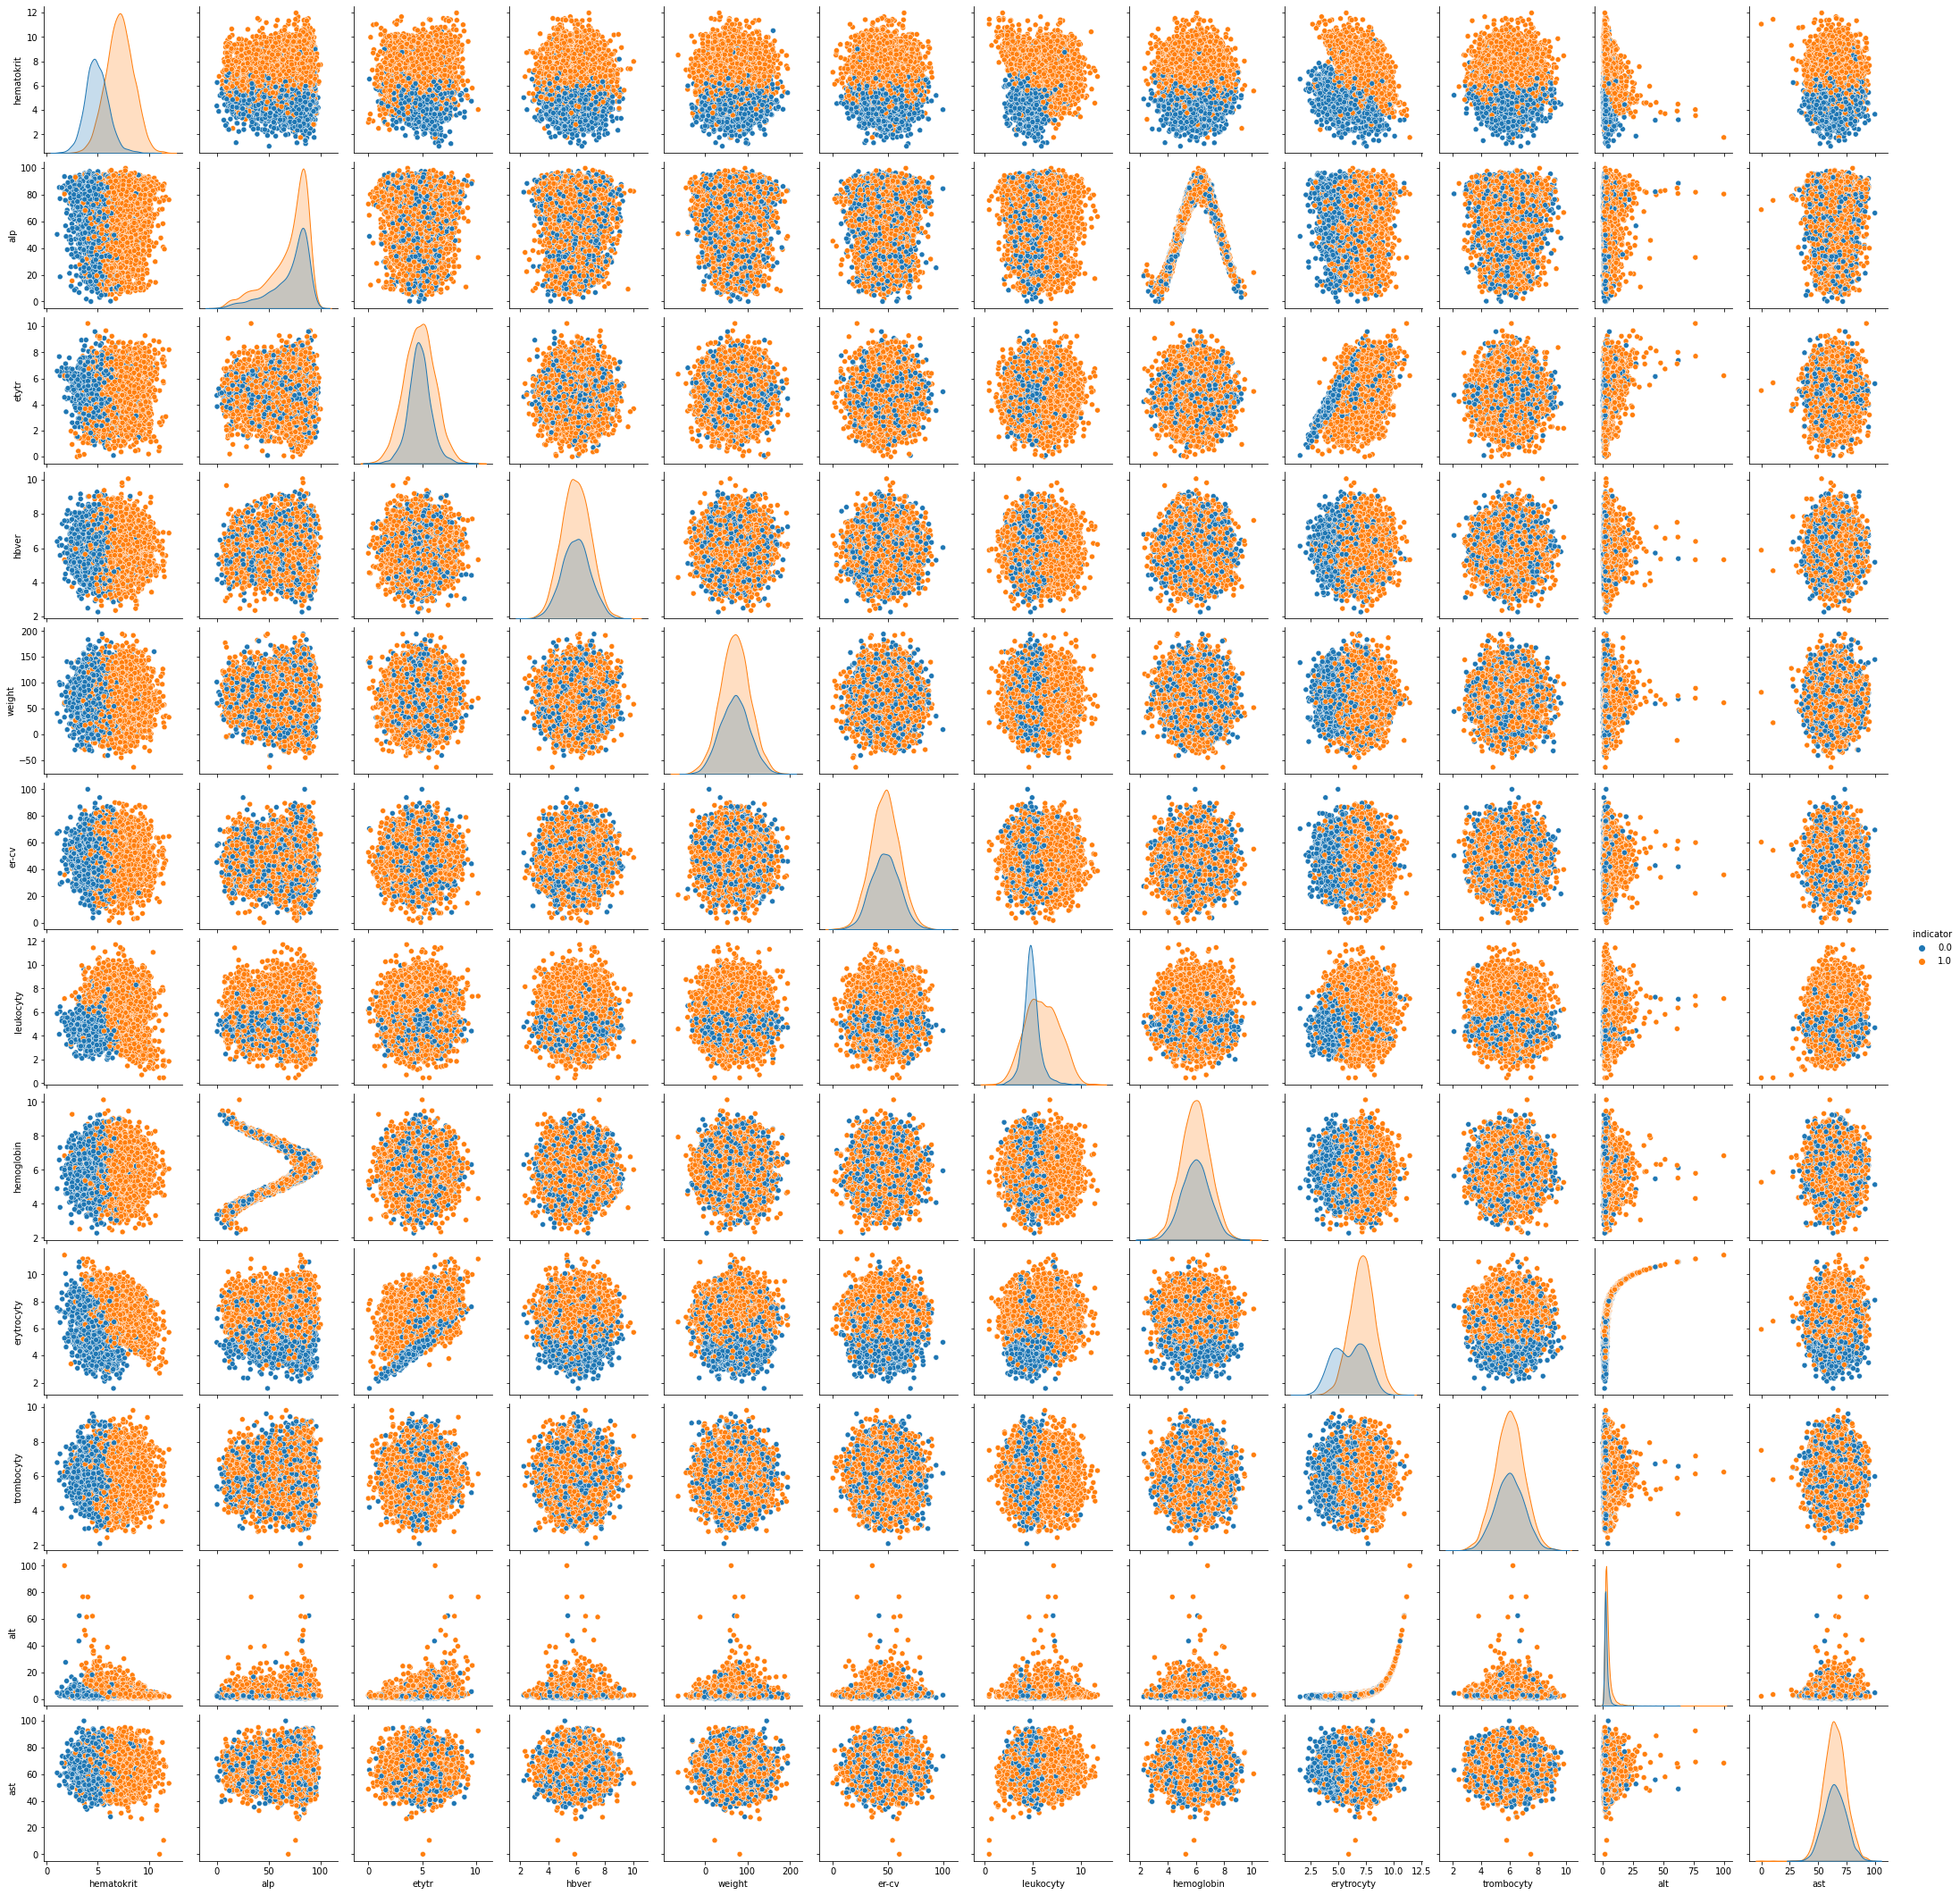

In [43]:
sns.pairplot(merged_dataframe, hue = "indicator");

Vizualizácia do grafov medzi zvolenými atribútmi, pomocou ktorých vieme povedať, že ktoré stĺpce sú závislé podľa toho, že ak nám tieto atribúty vytvárajú graf momentálne neidentifikovateľnej funkcie, tak sú od seba závislé. Vieme pozorovať taktiež body, ktoré pripomínajú akési zhluky, kde taktiež vieme povedať či sú závislé alebo nie sú závislé. V neposlednom rade je tu skupina grafov, z ktorých nevyplýva žiadna štruktúra ani pravidelnosť, ani závislosť, tak tie nebudeme rozoberať vôbec.

V tomto rozložení grafov je to neprehľadné, ale nižšie budu rozobrané bližšie tie pre nás zaujímavé grafy.

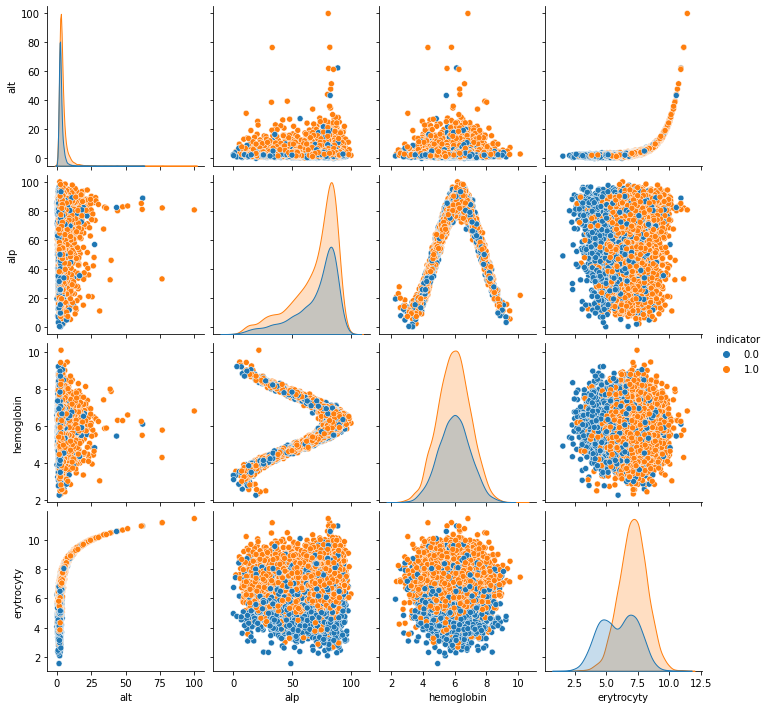

In [44]:
sns.pairplot(merged_dataframe[["alt", "alp", "hemoglobin", "erytrocyty", "indicator"]], hue = "indicator");

Zobrazenie dvojíc, ktoré nás zaujímajú najviac, a ktorým sa budeme venovať.

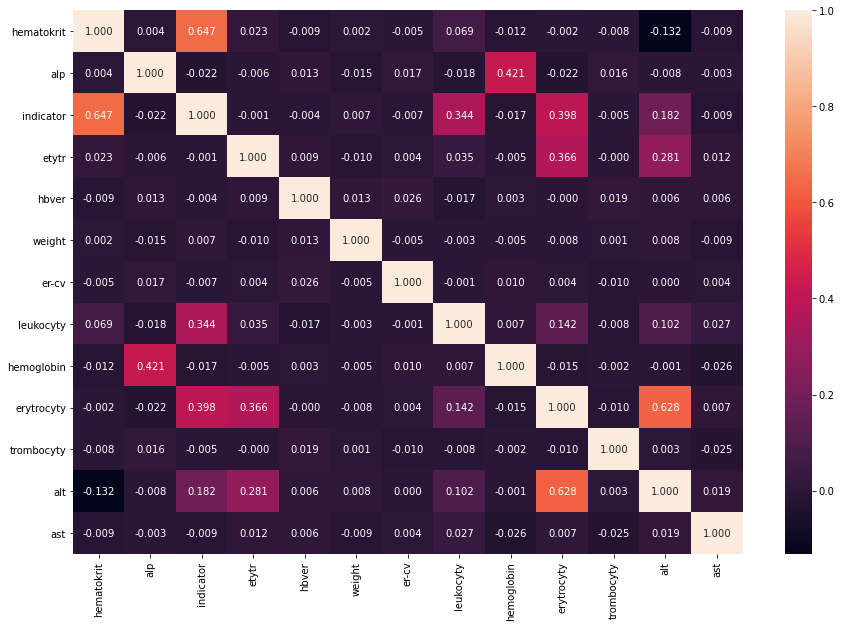

In [45]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(merged_dataframe.corr(), ax = ax, annot = True, fmt = ".3f");

Najjednoduchší a najprehľadnejší spôsob ako zistiť závislosť medzi atribútmi je pomocou tzv. heat mapy, kde podľa farby vieme a skrz legendu si overíme, že čím svetlejšia alebo čím tmavšia, tak tým je väčšia závislosť. Prvky, ktoré majú farbu okolu nuly, tak považujeme za nezávislé.

Pomocou týchto grafov, ktoré sa týkajú atribútov hemoglobínu a alp vieme povedať, aké vzťahy medzi atribútmi hemoglobín a alp sú, že ak sa nám v krivke zvyšuje množstvo hemoglobínu v krvi, tak stúpa do určitého momentu hodnota alp, ak dosiahne vrchol, tak sa táto situácia otočí a začnú obidva atribúty klesať, sú závislé úmerne.

Pearson correlation: 0.421


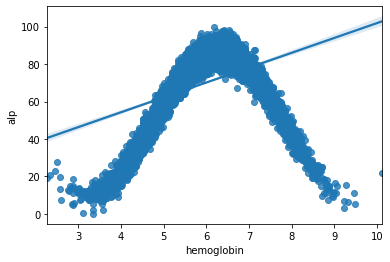

In [46]:
sns.regplot(x = "hemoglobin", y = "alp", data = merged_dataframe)
print("Pearson correlation: %.3f" % merged_dataframe.hemoglobin.corr(merged_dataframe.alp))

Pearson correlation: 0.421


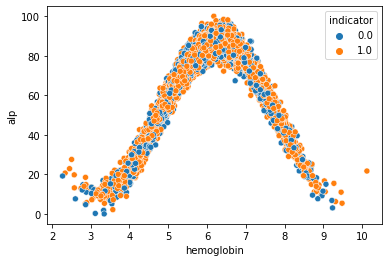

In [47]:
sns.scatterplot(x = "hemoglobin", y = "alp", hue = "indicator", data = merged_dataframe)
print("Pearson correlation: %.3f" % merged_dataframe.hemoglobin.corr(merged_dataframe.alp))

/Users/martinkatkovcin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


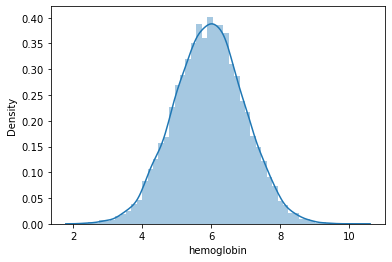

In [48]:
sns.distplot(merged_dataframe["hemoglobin"]);

Pomocou týchto grafov, ktoré sa týkajú atribútov alp a erytrocytov vieme povedať, že pacient, ktorý má vyšší erytrocyt, tak potrebuje vyšetrenie v preddefinovanom intervale.

/Users/martinkatkovcin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


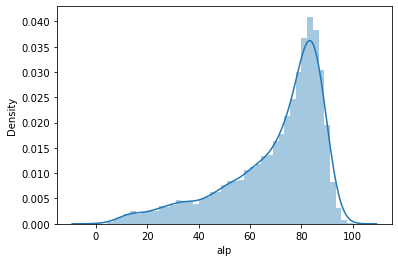

In [49]:
sns.distplot(merged_dataframe["alp"]);

Pomocou distplotov, sme znázornili distribúciu hemoglobínu a hodnoty alp.

Pomocou týchto grafov, ktoré sa týkajú atribútov erytrocytov a alt vieme povedať, aké vzťahy medzi atribútmi erytrocyty a alt sú, že ak sa nám v krivke zvyšuje množstvo erytrocytov v krvi, tak stúpa do taktiež hodnota alt, vieme prehlásiť taktiež, že sú tieto atribúty závislé.

Pearson correlation: 0.628


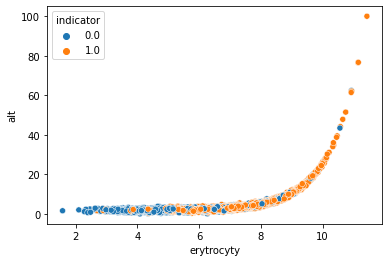

In [50]:
sns.scatterplot(x = "erytrocyty", y = "alt", hue = "indicator", data = merged_dataframe)
print("Pearson correlation: %.3f" % merged_dataframe.erytrocyty.corr(merged_dataframe.alt))

Pearson correlation: 0.628


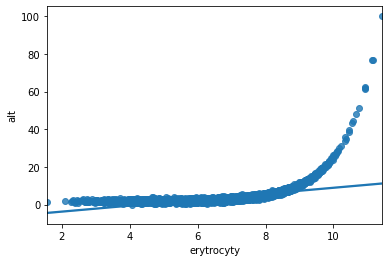

In [51]:
sns.regplot(x = "erytrocyty", y = "alt", data = merged_dataframe)
print("Pearson correlation: %.3f" % merged_dataframe.erytrocyty.corr(merged_dataframe.alt))

/Users/martinkatkovcin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


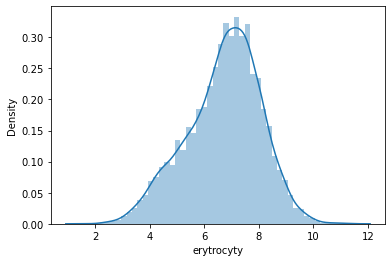

In [52]:
sns.distplot(merged_dataframe["erytrocyty"]);

/Users/martinkatkovcin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


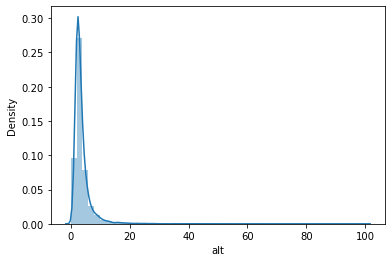

In [53]:
sns.distplot(merged_dataframe["alt"]);

Pomocou distplotov, sme znázornili distribúciu erytrocytov a hodnoty alt.

## 3. Formulácia a štatistické overenie hypotéz o dátach 

*	sformulujte dve hypotézy o dátach v kontexte zadanej predikčnej úlohy. Príkladom je napr. pacienti v zlepšenom stave majú v priemere inú (vyššiu/nižšiu) hodnotu nejakej látky alebo hormónu ako pacienti v nezlepšenom stave.

*	sformulované hypotézy overte vhodne zvoleným štatistickým testom.


In [54]:
def cohen_d(x, y):
    s = np.sqrt(((len(x) - 1) * np.std(x, ddof = 1) ** 2 
                 + (len(y) - 1) * np.std(y, ddof = 1) ** 2) / (len(x) + len(y) - 2))
    d = (np.abs(np.mean(x) - np.mean(y))) / s
    return d

In [55]:
def test_normality(data, attr, hue, hue_values, clean_outliers_multiple_times = False, distplot = True):
    
    distributions = []
    names = []
    
    for h in hue_values:
        distributions.append(data.loc[(data[hue] == h) & (data[attr].notna())][attr])
        names.append(attr + "(" + hue + "=" + str(h) + ")")
    
    for i in range(len(hue_values)):
        while len(identify_outliers(distributions[i])) > 0:
            distributions[i] = distributions[i].drop(index = identify_outliers(distributions[i]).index)
            if clean_outliers_multiple_times == False:
                break

        sm.ProbPlot(distributions[i], fit = True).qqplot(line = "45", label = names[i])
        plt.legend()
        plt.show()
        
    for i in range(len(hue_values)):
        sns.distplot(distributions[i], label = names[i])
        
    plt.legend()
    plt.show()
    
    for i in range(len(hue_values)):
        print(names[i], "Shapirov test: p-value:", stats.shapiro(distributions[i])[1])        
    
    return distributions

In [56]:
def mann_whitney(distributions):
    pvalue = stats.mannwhitneyu(distributions[0], distributions[1])[1]
    print("Hodnota pvalue:", pvalue)

    if pvalue < 0.05:
        print("Zamietame hypotezu H0")
        
        cohen_value = cohen_d(distributions[0], distributions[1])
        power = sm_stats.power.tt_ind_solve_power(effect_size = cohen_value, nobs1 = len(distributions[0]), alpha = 0.05, 
        power = None, ratio = len(distributions[1]) / len(distributions[0]))

        print("Sila testu:", power)
        
        if power > 0.8:
            print("Dostatocne velka sila testu")
        else:
            print("Nedostatocne velka sila testu")
        
    else:
        print("Nedokazeme zamietnut hypotezu H0")  

In [57]:
def student_ttest(data1, data2):
    stat, p = ttest_ind(data1, data2)
    print("Statistics = %.3f, p = %.3f" % (stat, p))

    if p > 0.05:
        print ("Same distributions (fail to reject H0)")
    else:
        print ("Different distributions (rejected H0)")

### 3.1 Hypotéza č. 1

H0 - Ľudia, ktorí potrebujú vyšetrenie v preddefinovanom intervale (identifikátor = 1), majú podobnú hodnotu hematokritu ako ľudia, ktorých liečba sa môže posunúť.

H1 - Ľudia, ktorí potrebujú vyšetrenie v preddefinovanom intervale (indentifikátor = 1), majú vyššiu/nižšiu hodnotu hematokritu ako ľudia, ktorých liečba sa môže posunúť.

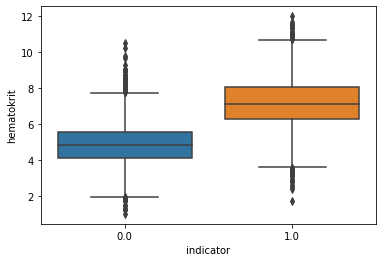

In [58]:
sns.boxplot (x = "indicator", y = "hematokrit", data = labor_dataframe);

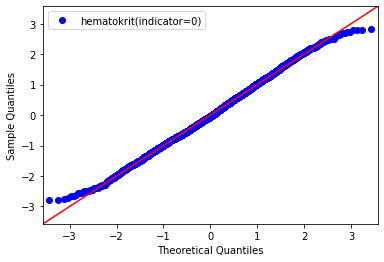

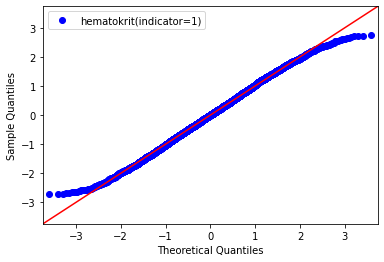

/Users/martinkatkovcin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/martinkatkovcin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


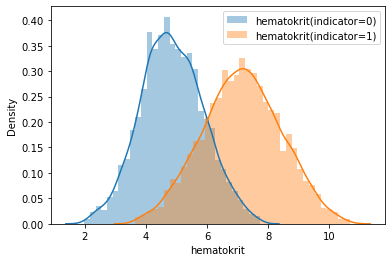

hematokrit(indicator=0) Shapirov test: p-value: 0.00031098120962269604
hematokrit(indicator=1) Shapirov test: p-value: 1.1385152021148315e-07
Kolmogorov-Smirnov test: KstestResult(statistic=1.0, pvalue=0.0)


/Users/martinkatkovcin/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [59]:
distributions = test_normality(merged_dataframe, "hematokrit", "indicator", [0,1])
print("Kolmogorov-Smirnov test:", ks_2samp(merged_dataframe.hematokrit, merged_dataframe.indicator))

Heavy tailed krivka QQ-plotu. Odstránenie outlierov, zobrazenie hodnôt podľa indikátoru v distplote, kde môžeme už vidieť, že sa nám hypotéza potvrdí. Shapirov test nám hovorí, že nemáme normálnu distribúciu, ale nad viac ako 5000 prvkov sme použili aj Kolmogorov-Smirnov test, kde sa nám taktiež potvrdilo, to čo tvrdíme, že nie sú vzorky z rovnakej distribúcie.

Nemáme normálnu distribúciu, musíme použiť nie-parametrické štatistické testy. Zvolili sme si teda **Mann-Whitney U test** a taktiež aj **Studentov T-test**.

In [60]:
mann_whitney(distributions)
stat, p = mannwhitneyu(merged_dataframe["hematokrit"], merged_dataframe["indicator"])
print("Hodnota pvalue by scipy", p)

Hodnota pvalue: 0.0
Zamietame hypotezu H0
Sila testu: 1.0
Dostatocne velka sila testu
Hodnota pvalue by scipy 0.0


In [61]:
student_ttest(merged_dataframe.hematokrit, merged_dataframe.indicator)

Statistics = 323.333, p = 0.000
Different distributions (rejected H0)


Pomocou týchto testov, sme zistili, že H0 hypotézu teda môžeme zamietnuť a platí H1 v pôvodnom znení, resp. vieme špecifikovať, že majú vyššiu hodnotu hematokritu pacienti, ktorým liečba nemôže byť posunutá na iný termín, ako je preddefinovaný.

### 3.2 Hypotéza č. 2

H0 - Ľudia, ktorí potrebujú vyšetrenie v preddefinovanom intervale (identifikátor = 1), majú rovnakú hodnotu erytrocytov ako pacienti, ktorých liečba sa môže posunúť.

H1 - Ľudia, ktorí potrebujú vyšetrenie v preddefinovanom intervale (indentifikátor = 1), majú väčšiu/menšiu hodnotu erytrocytov ako pacienti, ktorých liečba sa môže posunúť.

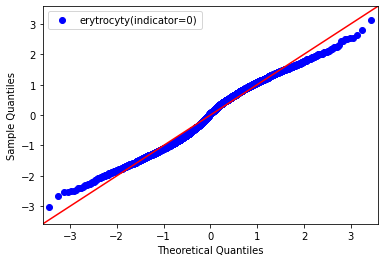

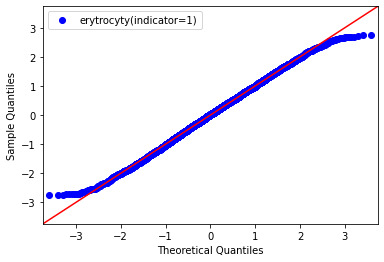

/Users/martinkatkovcin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/martinkatkovcin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


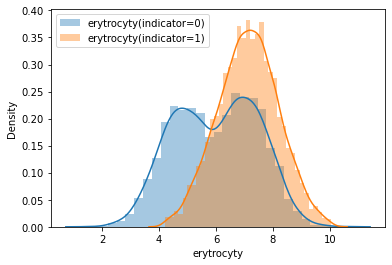

erytrocyty(indicator=0) Shapirov test: p-value: 1.4271873143548182e-19
erytrocyty(indicator=1) Shapirov test: p-value: 2.739880301305675e-06
Kolmogorov-Smirnov test: KstestResult(statistic=1.0, pvalue=0.0)


/Users/martinkatkovcin/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [62]:
distributions = test_normality(merged_dataframe, "erytrocyty", "indicator", [0,1])
print("Kolmogorov-Smirnov test:", ks_2samp(merged_dataframe.erytrocyty, merged_dataframe.indicator))

Odstránenie outlierov, zobrazenie hodnôt podľa indikátoru v distplote, kde môžeme už vidieť, že sa nám hypotéza potvrdí. Shapirov test nám hovorí, že nemáme normálnu distribúciu, ale nad viac ako 5000 prvkov sme použili aj Kolmogorov-Smirnov test, kde sa nám taktiež potvrdilo, to čo tvrdíme, že nie sú vzorky z rovnakej distribúcie.

Nemáme normálnu distribúciu, musíme použiť nie-parametrické štatistické testy. Zvolili sme si teda **Mann-Whitney U test** a taktiež aj **Studentov T-test**.

In [63]:
mann_whitney(distributions)
stat, p = mannwhitneyu(merged_dataframe["hematokrit"], merged_dataframe["indicator"])
print("Hodnota pvalue by scipy", p)

Hodnota pvalue: 4.790107626373369e-284
Zamietame hypotezu H0
Sila testu: 1.0
Dostatocne velka sila testu
Hodnota pvalue by scipy 0.0


In [64]:
student_ttest(merged_dataframe.erytrocyty, merged_dataframe.indicator)

Statistics = 411.855, p = 0.000
Different distributions (rejected H0)


Pomocou týchto testov, sme zistili, že H0 hypotézu teda môžeme zamietnuť a platí H1 v pôvodnom znení, resp. vieme špecifikovať, že majú vyššiu hodnotu erytrocytov pacienti, ktorým liečba nemôže byť posunutá na iný termín, ako je preddefinovaný.

## 5. Zhrnutie

Na záver nám dovoľte, aby sme zhrnuli to, čo sa nám v 1. fáze odovzdania projektu, ktorý nesie názov 'Prieskumná analýza'.

Podarilo sa nám vypracovať:

* 1. bod 

    * uviedli sme počet záznamov oboch datasetov
    
    * uviedli sme počet atribútov oboch datasetov 
    
    * typy atribútov, ktoré sa nachádzali v oboch datasetoch
    
    * pre nami dôležité atribúty sme vykonali:
        
        * distribúcie a základné deškriptívne štatistiky
        
* 2. bod
    
    * preskúmali sme rôzne vzťahy medzi atribútami
    
    * našli sme korelácie, ktoré sme pomocou tabuľky a grafov zobrazili
    
    * spolu so scatterplotmi a regplotmi sme zobrazili Pearsonovu hodnotu korelácie
    
* 3. bod
    
    * podarilo sa nám sformulovať 2 hypotézy, ktoré sa týkali nášho skúmaného problému (CLL)
    
    * hypotézy boli overené štatistickými testami (Shapiro, Mann-Whitney U...)

* 4. bod

   * úspešne sme identifikovali problémy, ktoré sa nachádzali v datasetoch a taktiež sme niektoré z nich upravili pre terajšiu potrebu, kde v ďalšej fáze bude data cleaning vyzerať tak, aby sme ho úspešne pripravili pre strojové učenie, čo znamená, že budeme nahrádzať všetky nečíselné hodnoty tak, aby sme ich reprezentovali pomocou čísel (napr. smoker - 1, 0 - nie - Y, N) 
    
    * v dátach sa nachádzala nevhodná štrukturá dát, rôzne 'typos', duplicitné záznamy v labor_dataframe, nejednotné formáty v stĺpci birthday, kde sme mali rôzne formáty dátumov (upravené na jednotný), nájdené NA hodnoty, ktoré budeme v ďalšej fáze nahrádzať, a v neposlednom rade vychýlené hodnoty, tzv. outliers, ktorými sa taktiež budeme zaoberať v ďalšej fáze projektu     